In [ ]:
!pip install missingno

In [34]:
# importing standard libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Exploring Fuel.csv

In [35]:
# Load the dataset
fuel_data = pd.read_csv('Data/Fuel.csv')

# Display the first few rows of the dataframe
fuel_data.head()

,Facility.Id,FRS.Id,Facility.Name,City,State,Primary.NAICS.Code,Year,Industry.Type,Sector,Unit.Name,Fuel.Type,Specific.Fuel.Type,Other.Fuel.Name,Blend.Fuel.Name,Methane.emissions,Nitrous.Oxide.emissions
0,1000112,1.100440e+11,23rd and 3rd,Brooklyn,NY,221112,2022,"C,D",Power Plants,2301,Natural Gas,Natural Gas (Weighted U.S. Average),NaN,NaN,16.5,20.86
1,1000112,1.100440e+11,23rd and 3rd,Brooklyn,NY,221112,2022,"C,D",Power Plants,2302,Natural Gas,Natural Gas (Weighted U.S. Average),NaN,NaN,15.0,17.88
2,1000112,1.100440e+11,23rd and 3rd,Brooklyn,NY,221112,2022,"C,D",Power Plants,Heatec1,Natural Gas,Natural Gas (Weighted U.S. Average),NaN,NaN,0.0,0.00
3,1000112,1.100440e+11,23rd and 3rd,Brooklyn,NY,221112,2022,"C,D",Power Plants,Heatec2,Natural Gas,Natural Gas (Weighted U.S. Average),NaN,NaN,0.0,0.00
4,1000112,1.100440e+11,23rd and 3rd,Brooklyn,NY,221112,2021,"C,D",Power Plants,2301,Natural Gas,Natural Gas (Weighted U.S. Average),NaN,NaN,11.0,11.92


### Features of Fuel.csv

From the Problem Statement Document:

**Industry information**: 
- Facility.Id: identification number of the industry 

- FRS.Id (Facility Registry Service): identifies and geospatially locates facilities subject to  environmental regulations or of environmental interest 

- Facility.Name: name of the company 

- City 

- State 

- Primary.NAICS.Code: a number used to indicate a company’s primary line of business - Year 

- Industry.Type 

- Sector 

- Unit.Name: industry classification based on what they produce

**Types of Fuel used by industry’s production**: 


- Fuel.Type: the energy provided to the process 

- Specific.Fuel.Type 

- Other.Fuel.Name 

- Blend.Fuel.Name 

**Gas emissions**: 
- Methane.emissions: quantity of methane emissions measured in metric tons - Nitrous.Oxide.emissions: quantity of nitrous oxide emissions measured in metric tons 


### Summary Statistics and Missing Values

In [14]:

# Summary statistics of the dataset
summary_statistics = fuel_data.describe().style.format("{:.2f}")
summary_statistics

,Facility.Id,FRS.Id,Primary.NAICS.Code,Year,Methane.emissions,Nitrous.Oxide.emissions
count,271087.00,271087.00,271087.00,271087.00,271087.00,271087.00
mean,1003882.59,109988520422.23,336164.10,2016.14,186.84,391.66
std,2601.77,1993334618.68,145848.77,3.46,1128.32,2225.71
min,1000001.00,7878.00,111419.00,2010.00,0.00,0.00
25%,1001373.00,110002000000.00,221112.00,2013.00,0.00,0.00
50%,1003647.00,110031000000.00,322121.00,2016.00,2.00,2.98
75%,1006362.00,110044000000.00,331111.00,2019.00,23.50,32.18
max,1009520.00,110044000000.00,928110.00,2022.00,51300.25,141043.40


The summary statistics for the numerical columns in the `Fuel.csv` dataset are as follows:

- `Facility.Id`: Range from 1,000,001 to 1,009,520.
- `FRS.Id`: Range from 7,878 to 1.10044e+11.
- `Primary.NAICS.Code`: Range from 111419 to 928110, with a median value of 322121.
- `Year`: Data from the years 2010 to 2022.
- `Methane.emissions`: Range from 0 to 51,300.25, with a median of 2.
- `Nitrous.Oxide.emissions`: Range from 0 to 141,043.4, with a median of 2.98.


Facility.Id                     0
FRS.Id                          0
Facility.Name                   0
City                            0
State                           0
Primary.NAICS.Code              0
Year                            0
Industry.Type                   0
Sector                         20
Unit.Name                       0
Fuel.Type                      22
Specific.Fuel.Type            206
Other.Fuel.Name            269756
Blend.Fuel.Name            270617
Methane.emissions               0
Nitrous.Oxide.emissions         0
dtype: int64

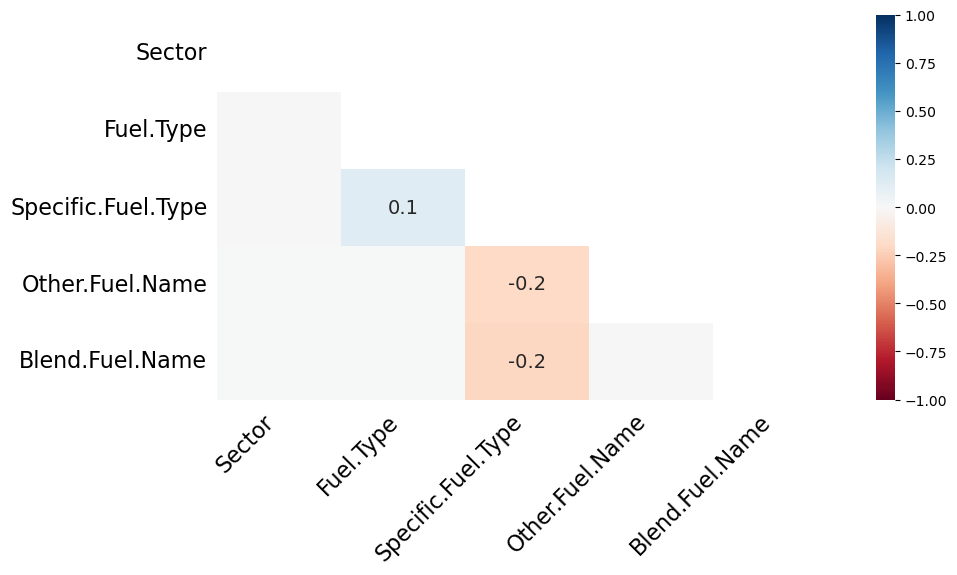

In [6]:
# Check for missing values in the dataset
import missingno as msno # missingno package is used to visualize missing data

missing_values = fuel_data.isnull().sum()

# Visualize the missing values and their correlations using a heatmap
msno_heatmap = msno.heatmap(fuel_data, figsize=(10, 5))

# Display summary statistics and missing values
missing_values

### Unique Values 

In [5]:
# check for unique values in state, industry, and fuel type
unique_values = fuel_data.nunique()
unique_values

Facility.Id                 5846
FRS.Id                        45
Facility.Name               6381
City                        3002
State                         54
Primary.NAICS.Code           297
Year                          13
Industry.Type                138
Sector                        69
Unit.Name                  18674
Fuel.Type                      8
Specific.Fuel.Type            62
Other.Fuel.Name              230
Blend.Fuel.Name              107
Methane.emissions          12271
Nitrous.Oxide.emissions    12481
dtype: int64

In [36]:
# Can look at 8 unique values of Fuel Type
fuel_data['Fuel.Type'].unique()

array(['Natural Gas', 'Petroleum Products', 'Other', 'Coal', 'Fuel Gas',
       'Natural Gas ', nan, 'Biomass', 'Solid Byproducts'], dtype=object)

## Data Visualizations

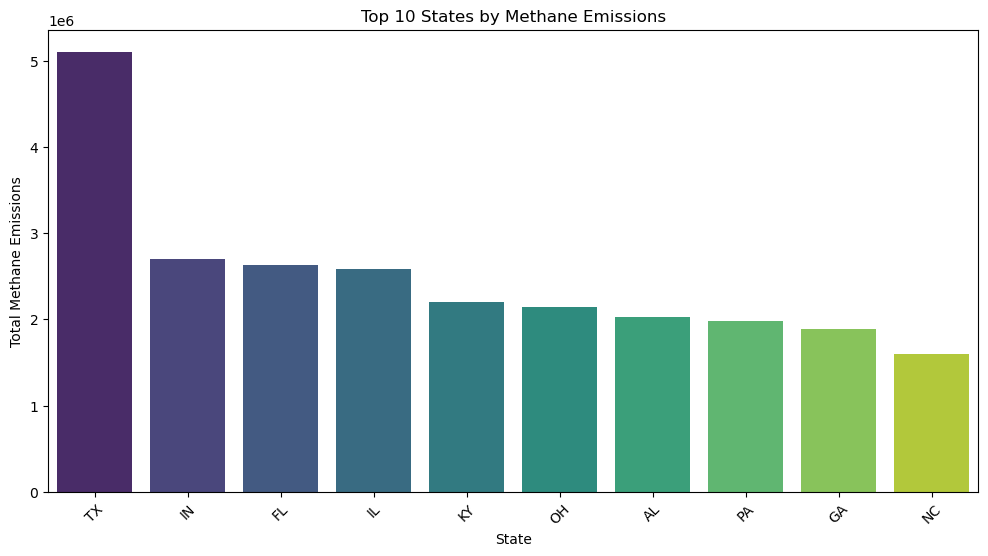

In [40]:

# Aggregate the data by state to sum up the emissions
state_emissions = fuel_data.groupby('State').agg({'Methane.emissions':'sum', 'Nitrous.Oxide.emissions':'sum'}).reset_index()

# Sort the aggregated data to find the top emitting states
top_states_by_emissions = state_emissions.sort_values(by='Methane.emissions', ascending=False).head(10)

# Plotting the emissions by state
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
sns.barplot(x='State', y='Methane.emissions', data=top_states_by_emissions, palette='viridis')
plt.title('Top 10 States by Methane Emissions')
plt.xlabel('State')
plt.ylabel('Total Methane Emissions')
plt.xticks(rotation=45)  # Rotate state labels for better readability

# Show the figure
plt.show()


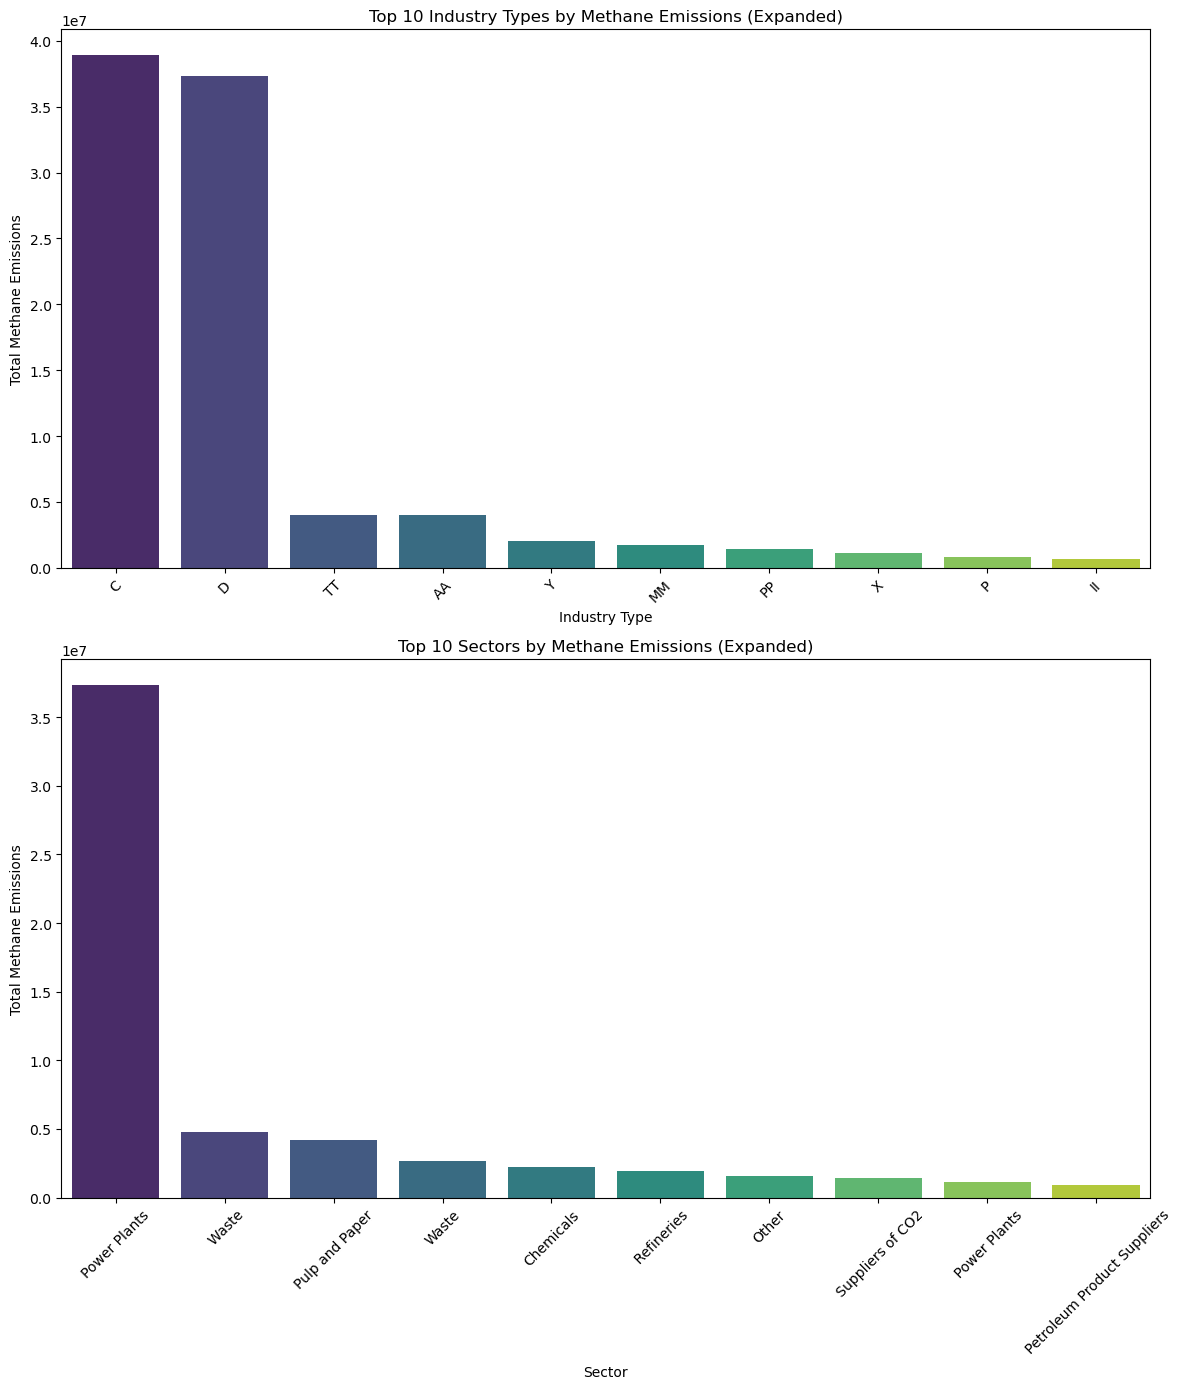

In [39]:
# Function to split and expand the combined categories
def expand_categories(df, column_name):
    # Split the combined categories
    s = df[column_name].str.split(',', expand=True).stack()
    # Align with the original dataframe index
    i = s.index.get_level_values(0)
    df_expanded = df.loc[i].copy()
    df_expanded[column_name] = s.values
    return df_expanded

# Apply the function to Industry.Type and Sector columns
expanded_industry = expand_categories(fuel_data, 'Industry.Type')
expanded_sector = expand_categories(fuel_data, 'Sector')

# Aggregate the data again
industry_emissions_expanded = expanded_industry.groupby('Industry.Type').agg({'Methane.emissions':'sum', 'Nitrous.Oxide.emissions':'sum'}).reset_index()
sector_emissions_expanded = expanded_sector.groupby('Sector').agg({'Methane.emissions':'sum', 'Nitrous.Oxide.emissions':'sum'}).reset_index()

# Find the top emitters for the expanded categories
top_industries_by_emissions_expanded = industry_emissions_expanded.sort_values(by='Methane.emissions', ascending=False).head(10)
top_sectors_by_emissions_expanded = sector_emissions_expanded.sort_values(by='Methane.emissions', ascending=False).head(10)

# Create a single figure with subplots for the expanded categories
fig, axes = plt.subplots(2, 1, figsize=(12, 14))

# Plotting the emissions by expanded industry type
sns.barplot(ax=axes[0], x='Industry.Type', y='Methane.emissions', data=top_industries_by_emissions_expanded, palette='viridis')
axes[0].set_title('Top 10 Industry Types by Methane Emissions (Expanded)')
axes[0].set_xlabel('Industry Type')
axes[0].set_ylabel('Total Methane Emissions')
axes[0].tick_params(axis='x', rotation=45)

# Plotting the emissions by expanded sector
sns.barplot(ax=axes[1], x='Sector', y='Methane.emissions', data=top_sectors_by_emissions_expanded, palette='viridis')
axes[1].set_title('Top 10 Sectors by Methane Emissions (Expanded)')
axes[1].set_xlabel('Sector')
axes[1].set_ylabel('Total Methane Emissions')
axes[1].tick_params(axis='x', rotation=45)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()


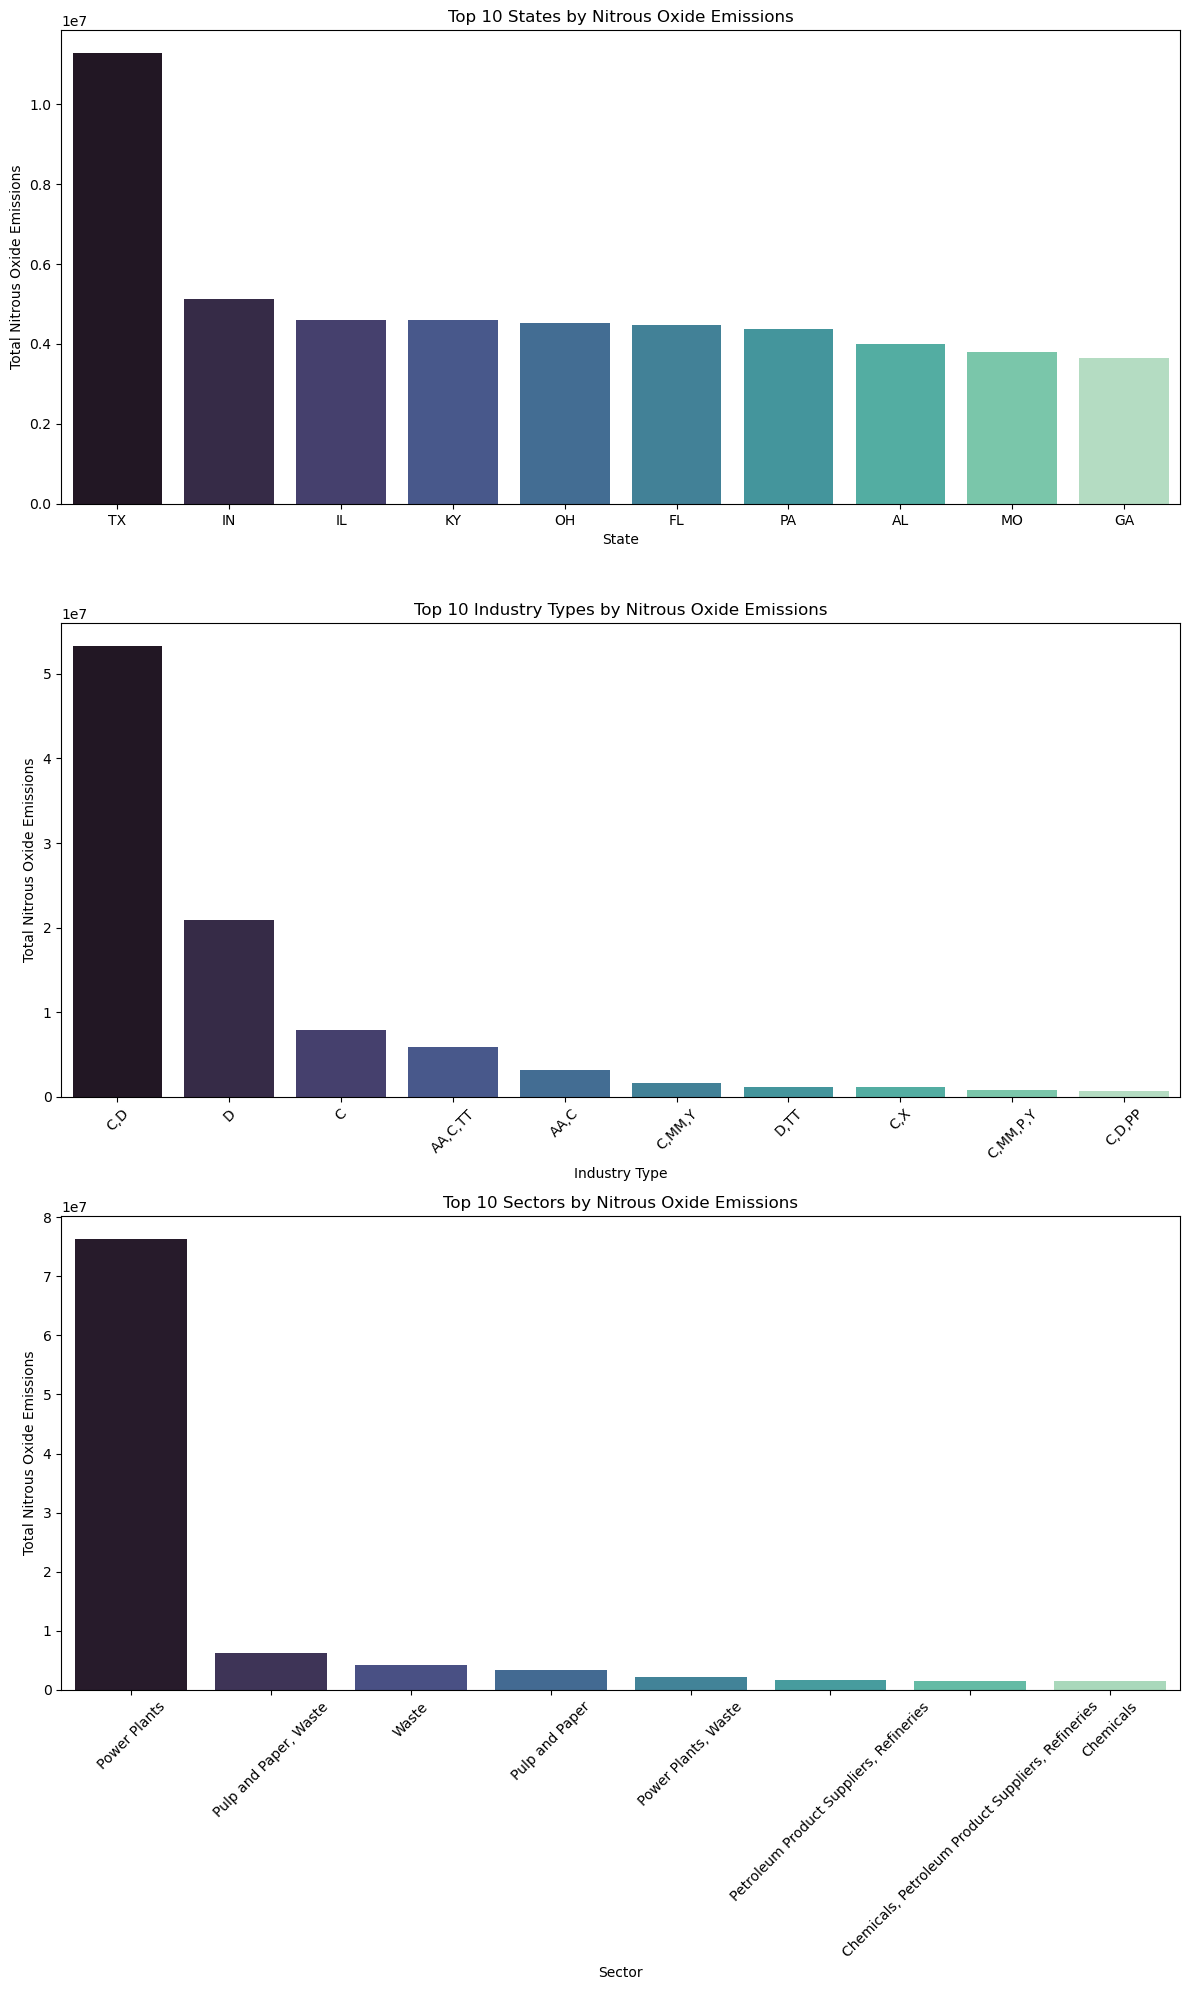

In [22]:
# Sorting the aggregated data to find the top emitters for Nitrous Oxide.
top_states_by_n2o_emissions = state_emissions.sort_values(by='Nitrous.Oxide.emissions', ascending=False).head(10)
top_industries_by_n2o_emissions = industry_emissions.sort_values(by='Nitrous.Oxide.emissions', ascending=False).head(10)
top_sectors_by_n2o_emissions = sector_emissions.sort_values(by='Nitrous.Oxide.emissions', ascending=False).head(8)

# Create a single figure with subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 20))

# Plotting the Nitrous Oxide emissions by state
sns.barplot(ax=axes[0], x='State', y='Nitrous.Oxide.emissions', data=top_states_by_n2o_emissions, palette='mako')
axes[0].set_title('Top 10 States by Nitrous Oxide Emissions')
axes[0].set_xlabel('State')
axes[0].set_ylabel('Total Nitrous Oxide Emissions')

# Plotting the Nitrous Oxide emissions by industry type
sns.barplot(ax=axes[1], x='Industry.Type', y='Nitrous.Oxide.emissions', data=top_industries_by_n2o_emissions, palette='mako')
axes[1].set_title('Top 10 Industry Types by Nitrous Oxide Emissions')
axes[1].set_xlabel('Industry Type')
axes[1].set_ylabel('Total Nitrous Oxide Emissions')
axes[1].tick_params(axis='x', rotation=45)

# Plotting the Nitrous Oxide emissions by sector
sns.barplot(ax=axes[2], x='Sector', y='Nitrous.Oxide.emissions', data=top_sectors_by_n2o_emissions, palette='mako')
axes[2].set_title('Top 10 Sectors by Nitrous Oxide Emissions')
axes[2].set_xlabel('Sector')
axes[2].set_ylabel('Total Nitrous Oxide Emissions')
axes[2].tick_params(axis='x', rotation=45)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()


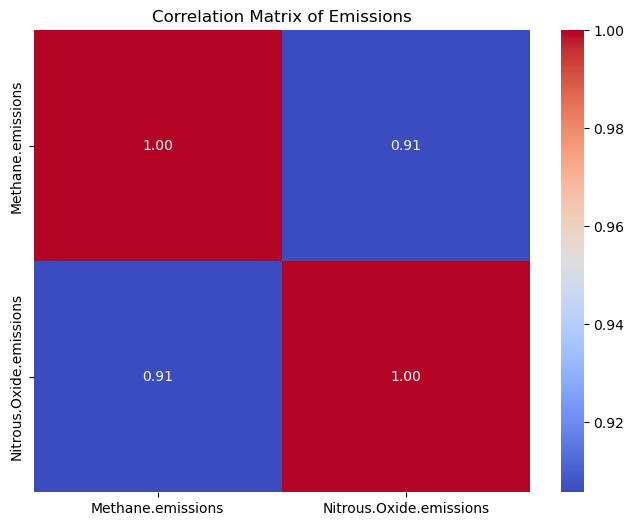

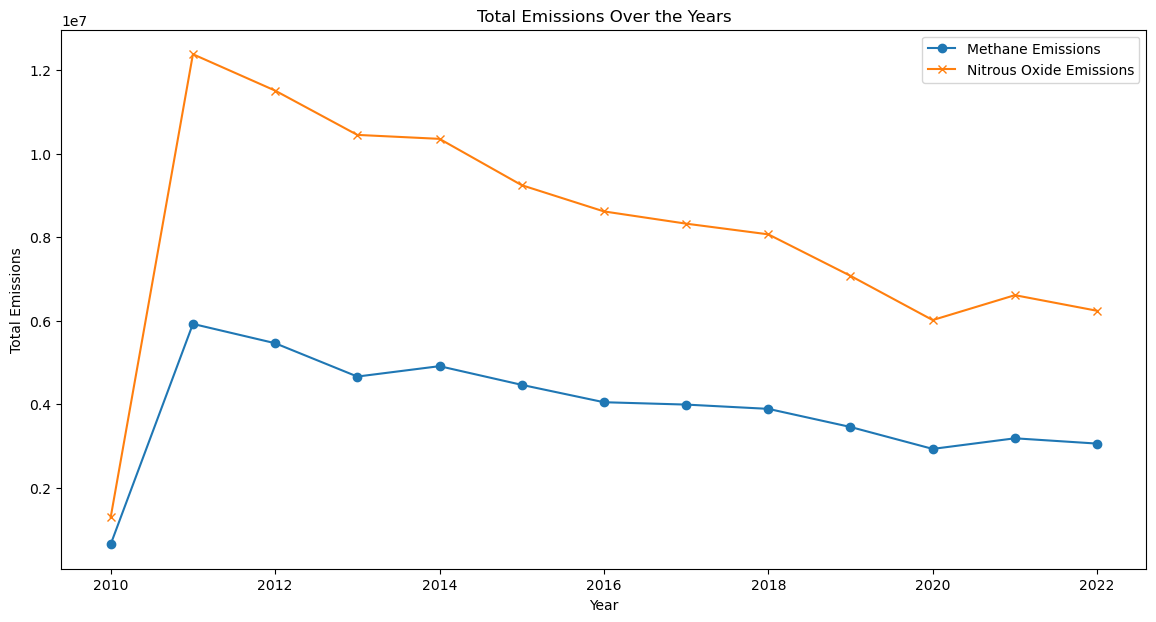

In [19]:
# Calculating the correlation matrix to understand the relationships between Methane and Nitrous
correlation_matrix = fuel_data[['Methane.emissions', 'Nitrous.Oxide.emissions']].corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Emissions')
plt.show()

# Let's also look at the aggregate emissions by year for any noticeable trends
yearly_emissions = fuel_data.groupby('Year').agg({'Methane.emissions':'sum', 'Nitrous.Oxide.emissions':'sum'}).reset_index()

# Plotting the total emissions over the years
plt.figure(figsize=(14, 7))
plt.plot(yearly_emissions['Year'], yearly_emissions['Methane.emissions'], marker='o', label='Methane Emissions')
plt.plot(yearly_emissions['Year'], yearly_emissions['Nitrous.Oxide.emissions'], marker='x', label='Nitrous Oxide Emissions')
plt.title('Total Emissions Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Emissions')
plt.legend()
plt.show()


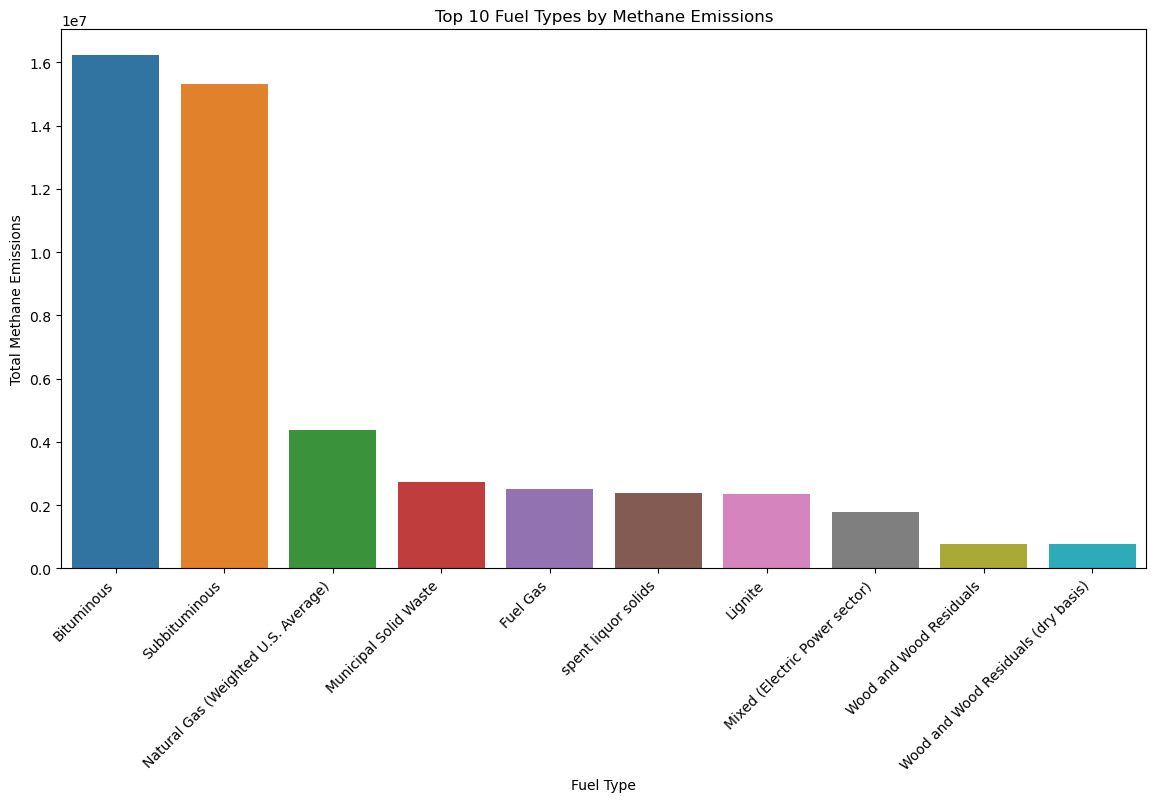

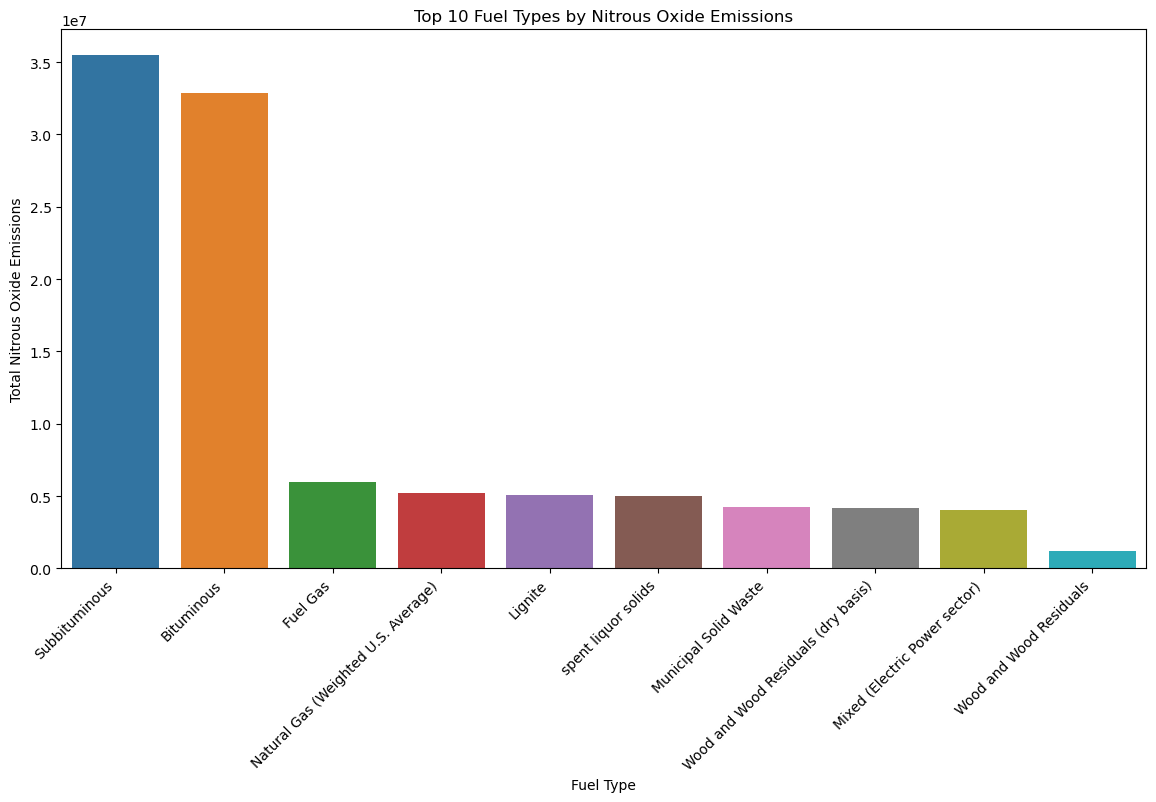

In [20]:
# First, we will aggregate the emissions by the specific fuel type to sum up the emissions.
fuel_type_emissions = fuel_data.groupby('Specific.Fuel.Type').agg({
    'Methane.emissions': 'sum', 
    'Nitrous.Oxide.emissions': 'sum'
}).reset_index()

# Sort the aggregated data to find the top emitting fuels.
top_fuels_by_methane = fuel_type_emissions.sort_values(by='Methane.emissions', ascending=False).head(10)
top_fuels_by_n2o = fuel_type_emissions.sort_values(by='Nitrous.Oxide.emissions', ascending=False).head(10)

# Plotting the Methane emissions by fuel type
plt.figure(figsize=(14, 7))
sns.barplot(x='Specific.Fuel.Type', y='Methane.emissions', data=top_fuels_by_methane, palette='tab10')
plt.title('Top 10 Fuel Types by Methane Emissions')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Fuel Type')
plt.ylabel('Total Methane Emissions')
plt.show()

# Plotting the Nitrous Oxide emissions by fuel type
plt.figure(figsize=(14, 7))
sns.barplot(x='Specific.Fuel.Type', y='Nitrous.Oxide.emissions', data=top_fuels_by_n2o, palette='tab10')
plt.title('Top 10 Fuel Types by Nitrous Oxide Emissions')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Fuel Type')
plt.ylabel('Total Nitrous Oxide Emissions')
plt.show()


### Geospatial Plots For Emissions By State 

Using Plotly

In [26]:
state_emissions = fuel_data.groupby('State').agg({
    'Methane.emissions': 'sum', 
    'Nitrous.Oxide.emissions': 'sum'
}).reset_index()

state_emissions.head()

,State,Methane.emissions,Nitrous.Oxide.emissions
0,AK,1.257175e+05,1.981208e+05
1,AL,2.023398e+06,4.001480e+06
2,AR,1.057779e+06,1.932424e+06
3,AZ,1.201027e+06,2.072143e+06
4,CA,6.699036e+05,1.142287e+06


In [32]:
import plotly.express as px

fig = px.choropleth(state_emissions,
                    locations='State',
                    locationmode="USA-states",
                    color='Methane.emissions',
                    scope="usa",
                    title='US Methane Emissions by State')
fig.show()

In [33]:
fig = px.choropleth(state_emissions.loc[:, ['State', 'Nitrous.Oxide.emissions']],
                    locations='State',
                    locationmode="USA-states",
                    color='Nitrous.Oxide.emissions',
                    scope="usa",
                    title='US Nitrous Oxide Emissions by State')
fig.show()

### Further visualizations 

For a comprehensive understanding of your data, consider exploring these additional visualizations:

1. **Heatmaps of Emissions by State and Year**: Display emissions over time across different states to identify trends and patterns.

2. **Box Plots by Industry Type or Sector**: Use box plots to examine the distribution of emissions within each industry type or sector, highlighting outliers and the variability within groups.

3. **Scatter Plots of Methane vs. Nitrous Oxide Emissions**: Investigate the relationship between the two types of emissions across facilities.

4. **Facility-Level Emission Intensity**: Plot the emissions per unit of production or energy generated to identify the most and least efficient facilities in terms of emissions.

5. **Emission Reductions Over Time**: If data is available, visualize the change in emissions over time to assess the impact of policies or improvements.



## To do: Statistical Analysis -> Checking significance

# Exploring Unit.csv

In [42]:
try:
    # Loading the dataset
    unit_df = pd.read_csv('Data/Unit.csv')
except Exception as e:
    print(e)


In [44]:
# Performing initial Exploratory Data Analysis (EDA)

# Displaying the first few rows of the dataframe to understand its structure
unit_df_head = unit_df.head()

# Getting a summary of the dataframe to understand the data types and missing values
unit_df_info = unit_df.info()

# Descriptive statistics to understand the numerical columns better
unit_df_description = unit_df.describe()

unit_df_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174528 entries, 0 to 174527
Data columns (total 17 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Facility.Id                  174528 non-null  int64  
 1   FRS.Id                       174528 non-null  float64
 2   Facility.Name                174528 non-null  object 
 3   City                         174528 non-null  object 
 4   State                        174528 non-null  object 
 5   Primary.NAICS.Code           174528 non-null  int64  
 6   Year                         174528 non-null  int64  
 7   Industry.Type                174528 non-null  object 
 8   Sector                       174508 non-null  object 
 9   Unit.Name                    174528 non-null  object 
 10  Unit.Type                    172241 non-null  object 
 11  Method                       174528 non-null  object 
 12  Max.Heat                     174528 non-null  float64
 13 

,Facility.Id,FRS.Id,Facility.Name,City,State,Primary.NAICS.Code,Year,Industry.Type,Sector,Unit.Name,Unit.Type,Method,Max.Heat,CO2.emissions.non.biogenic.,Methane.emissions,Nitrous.Oxide.emissions,CO2.emissions.biogenic.
0,1000112,1.100000e+11,23rd and 3rd,Brooklyn,NY,221112,2022,"C,D",Power Plants,Heatec1,PRH (Process Heater),Tier1/2/3,7.4,176.7,0.0,0.0,0.0
1,1000112,1.100000e+11,23rd and 3rd,Brooklyn,NY,221112,2022,"C,D",Power Plants,Heatec2,PRH (Process Heater),Tier1/2/3,7.4,154.7,0.0,0.0,0.0
2,1000112,1.100000e+11,23rd and 3rd,Brooklyn,NY,221112,2021,"C,D",Power Plants,Heatec1,PRH (Process Heater),Tier1/2/3,7.4,84.4,0.0,0.0,0.0
3,1000112,1.100000e+11,23rd and 3rd,Brooklyn,NY,221112,2021,"C,D",Power Plants,Heatec2,PRH (Process Heater),Tier1/2/3,7.4,78.9,0.0,0.0,0.0
4,1000112,1.100000e+11,23rd and 3rd,Brooklyn,NY,221112,2020,"C,D",Power Plants,Heatec1,PRH (Process Heater),Tier1/2/3,7.4,90.7,0.0,0.0,0.0


In [45]:
unit_df_description

,Facility.Id,FRS.Id,Primary.NAICS.Code,Year,Max.Heat,CO2.emissions.non.biogenic.,Methane.emissions,Nitrous.Oxide.emissions,CO2.emissions.biogenic.
count,1.745280e+05,1.745280e+05,174528.000000,174528.000000,1.745280e+05,1.745280e+05,174528.000000,174528.000000,174528.000000
mean,1.004404e+06,1.099887e+11,369818.272816,2016.161791,2.166825e+03,3.178995e+04,43.245250,90.886050,2698.073772
std,2.414371e+03,1.117057e+09,151582.619023,3.450168,3.679121e+05,9.979115e+04,209.260542,445.025982,26188.827634
min,1.000001e+06,7.878000e+03,111419.000000,2011.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,1.002311e+06,1.100000e+11,221112.000000,2013.000000,2.500000e+00,5.110000e+01,0.000000,0.000000,0.000000
50%,1.004470e+06,1.100000e+11,325110.000000,2016.000000,3.070000e+01,2.084250e+03,1.250000,1.788000,0.000000
75%,1.006505e+06,1.100000e+11,486210.000000,2019.000000,1.340000e+02,2.815040e+04,17.750000,24.734000,0.000000
max,1.009520e+06,1.100000e+11,928110.000000,2022.000000,1.470000e+08,3.332911e+06,7998.500000,14602.000000,775713.400000


In [46]:
# Handling missing values

# Checking the percentage of missing values in each column
missing_values_percentage = unit_df.isnull().mean() * 100

# For 'Sector', we can consider filling missing values with a placeholder like 'Unknown'
unit_df['Sector'].fillna('Unknown', inplace=True)

# For 'Unit.Type', considering the nature of the data, we might also use a placeholder like 'Not Specified'
unit_df['Unit.Type'].fillna('Not Specified', inplace=True)

# Rechecking missing values to confirm
missing_values_percentage_updated = unit_df.isnull().mean() * 100

missing_values_percentage, missing_values_percentage_updated


(Facility.Id                    0.000000
 FRS.Id                         0.000000
 Facility.Name                  0.000000
 City                           0.000000
 State                          0.000000
 Primary.NAICS.Code             0.000000
 Year                           0.000000
 Industry.Type                  0.000000
 Sector                         0.011459
 Unit.Name                      0.000000
 Unit.Type                      1.310391
 Method                         0.000000
 Max.Heat                       0.000000
 CO2.emissions.non.biogenic.    0.000000
 Methane.emissions              0.000000
 Nitrous.Oxide.emissions        0.000000
 CO2.emissions.biogenic.        0.000000
 dtype: float64,
 Facility.Id                    0.0
 FRS.Id                         0.0
 Facility.Name                  0.0
 City                           0.0
 State                          0.0
 Primary.NAICS.Code             0.0
 Year                           0.0
 Industry.Type                  0.

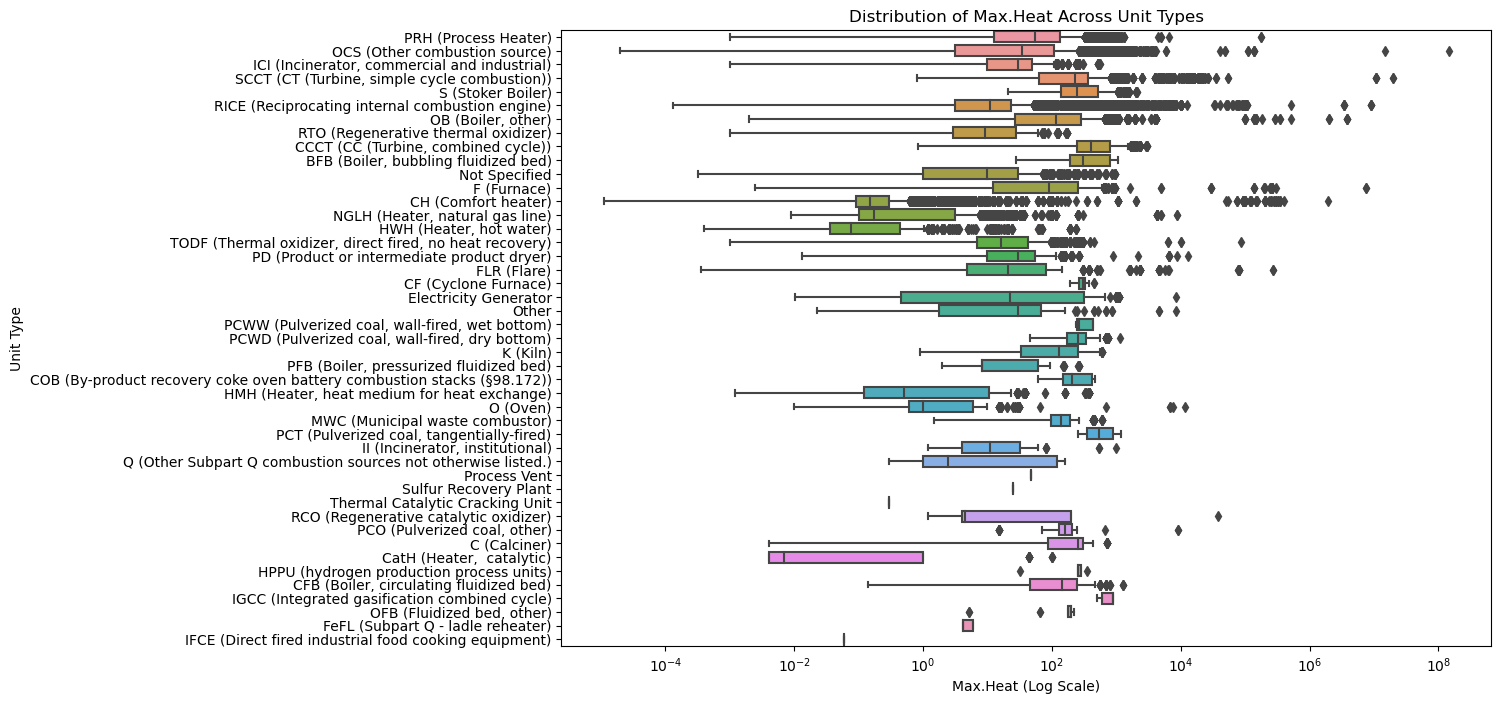

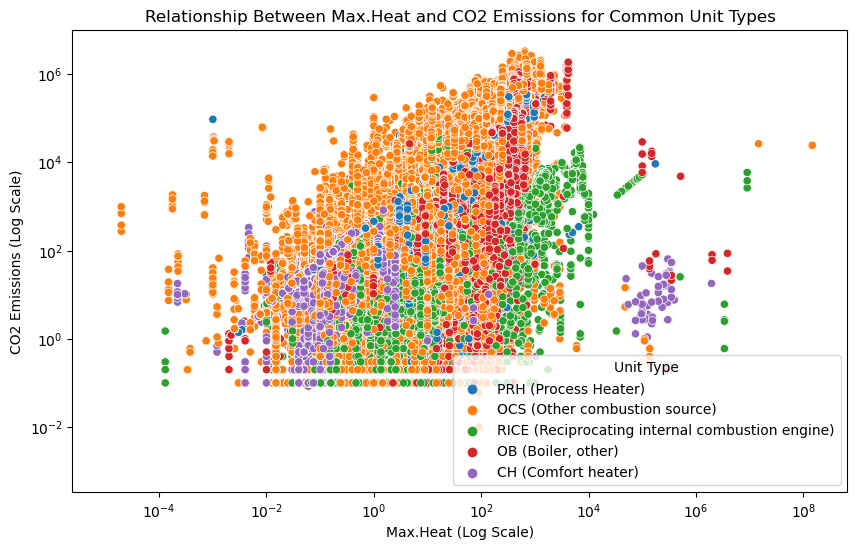

In [47]:
# Due to the wide range of Max.Heat, we'll use a logarithmic scale for clarity
plt.figure(figsize=(12, 8))
sns.boxplot(x='Max.Heat', y='Unit.Type', data=unit_df[unit_df['Max.Heat'] > 0], orient='h')
plt.xscale('log')
plt.title('Distribution of Max.Heat Across Unit Types')
plt.xlabel('Max.Heat (Log Scale)')
plt.ylabel('Unit Type')
plt.show()

# Next, we'll explore the relationship between Max.Heat and CO2 emissions for a subset of unit types
# Selecting a few common unit types for clarity in visualization
common_unit_types = unit_df['Unit.Type'].value_counts().index[:5]  # Top 5 unit types
subset_df = unit_df[unit_df['Unit.Type'].isin(common_unit_types)]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=subset_df, x='Max.Heat', y='CO2.emissions.non.biogenic.', hue='Unit.Type')
plt.xscale('log')
plt.yscale('log')
plt.title('Relationship Between Max.Heat and CO2 Emissions for Common Unit Types')
plt.xlabel('Max.Heat (Log Scale)')
plt.ylabel('CO2 Emissions (Log Scale)')
plt.legend(title='Unit Type')
plt.show()
